In [1]:
from functools import partial

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("prepared_data.csv", index_col="SEQN").rename(
    {"any_caffeine.1": "any_caffeine_log"}, axis=1
)
df.head()

,knn_impute__bmi_total,knn_impute__demo_age,knn_impute__activity_sed_min,simple_impute__alcohol_nmbr_drinks,simple_impute__poverty_num,zero_impute__activity_vig_min,zero_impute__activity_mod_min,zero_impute__smoking_cigs_pd,static_impute__occ_hours_worked,passthrough__any_caffeine,passthrough__is_male,passthrough__any_caffeine_log,one_hot__demo_race_str_asian_non_hisp,one_hot__demo_race_str_black,one_hot__demo_race_str_hispanic,one_hot__demo_race_str_other_or_multi,kidney_had_stones,kidney_passed_stone,kidney_weak_failing
SEQN,,,,,,,,,,,,,,,,,,,
109266,37.80,29.0,480.0,1.0,5.00,60.0,30.0,0.0,40.0,25.0,False,3.258097,1.0,0.0,0.0,0.0,False,False,False
109267,22.68,21.0,540.0,2.0,5.00,90.0,0.0,0.0,40.0,0.0,False,0.000000,0.0,0.0,1.0,0.0,False,False,False
109268,21.94,18.0,540.0,2.0,1.19,0.0,0.0,0.0,40.0,0.0,False,0.000000,0.0,0.0,0.0,0.0,False,False,False
109271,29.70,49.0,60.0,2.0,1.20,0.0,0.0,20.0,40.0,2087.5,True,7.644201,0.0,0.0,0.0,0.0,False,False,False
109273,21.90,36.0,180.0,2.0,0.53,0.0,120.0,15.0,28.0,21.5,True,3.113515,0.0,0.0,0.0,0.0,False,False,False


{'fit_time': array([16.14985538, 14.22616243, 13.67036271, 13.68364453, 14.02558303,
       14.59062648, 14.8326447 , 13.69930029, 14.20782113, 13.81542134]), 'score_time': array([0.47095418, 0.4764986 , 0.48262548, 0.48741078, 0.4726789 ,
       0.47793722, 0.4867053 , 0.47356057, 0.68240976, 0.48276997]), 'test_accuracy': array([0.91030928, 0.90927835, 0.91030928, 0.90918473, 0.91021672,
       0.91021672, 0.91021672, 0.91021672, 0.91021672, 0.91021672]), 'train_accuracy': array([0.99965608, 0.99965608, 0.99977072, 0.99977075, 0.99977075,
       0.99977075, 0.99965612, 0.99965612, 0.99965612, 0.99977075]), 'test_roc_auc': array([0.62512855, 0.67209487, 0.61563895, 0.61165688, 0.58803893,
       0.61018199, 0.66308699, 0.61272057, 0.61229051, 0.67472046]), 'train_roc_auc': array([0.99999919, 0.99999919, 0.9999996 , 0.99999968, 0.9999996 ,
       0.9999996 , 0.99999919, 0.99999927, 0.99999919, 0.99999968])}

cv accuracy: 0.9100381943336207
cv auc score: 0.6285558695551577


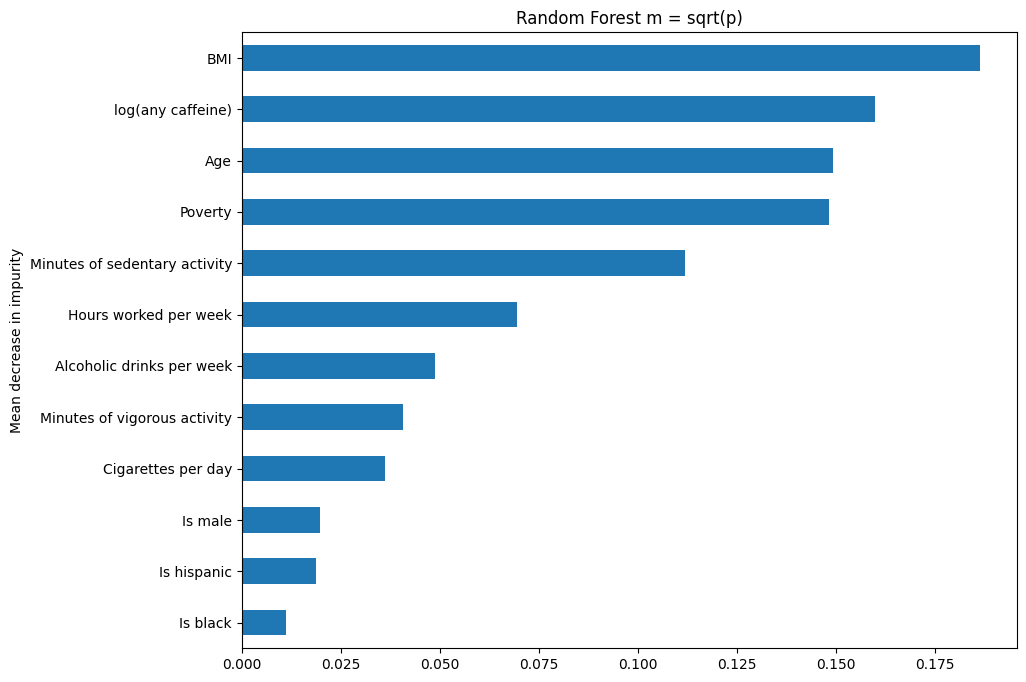

In [3]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rfc = RandomForestClassifier(n_estimators=1000, max_features = "sqrt", random_state=0, oob_score=True)
#print(df)
train_data_X = df.loc[:,[
        "knn_impute__bmi_total",
        "knn_impute__demo_age",
        "knn_impute__activity_sed_min",
        "simple_impute__alcohol_nmbr_drinks",
        "simple_impute__poverty_num",
        "zero_impute__activity_vig_min",
        # "zero_impute__activity_mod_min",
        "zero_impute__smoking_cigs_pd",
        "static_impute__occ_hours_worked",
        # "passthrough__any_caffeine",
        "passthrough__is_male",
        "passthrough__any_caffeine_log",
        # "one_hot__demo_race_str_asian_non_hisp",
        "one_hot__demo_race_str_black",
        "one_hot__demo_race_str_hispanic",
        # "one_hot__demo_race_str_other_or_multi",
        "kidney_had_stones",
        #"kidney_passed_stone",
        #"kidney_weak_failing"
    ]
]

column_map = {
        "knn_impute__bmi_total":"BMI",
        "knn_impute__demo_age":"Age",
        "knn_impute__activity_sed_min":"Minutes of sedentary activity",
        "simple_impute__alcohol_nmbr_drinks":"Alcoholic drinks per week",
        "simple_impute__poverty_num":"Poverty",
        "zero_impute__activity_vig_min":"Minutes of vigorous activity",
        #"zero_impute__activity_mod_min":"Minutes of moderate activity",
        "zero_impute__smoking_cigs_pd":"Cigarettes per day",
        "static_impute__occ_hours_worked":"Hours worked per week",
        #"passthrough__any_caffeine",
        "passthrough__is_male":"Is male",
        "passthrough__any_caffeine_log":"log(any caffeine)",
        #"one_hot__demo_race_str_asian_non_hisp":"Is asian",
        "one_hot__demo_race_str_black":"Is black",
        "one_hot__demo_race_str_hispanic":"Is hispanic",
        #"one_hot__demo_race_str_mexican_american":"Is mexican american",
        #"one_hot__demo_race_str_other_or_multi":"Is other or multiple races",
        "kidney_had_stones":"kidney_had_stones",
}

train_data_X = train_data_X.rename(column_map, axis=1)
train_data_full = train_data_X.copy()
train_data_Y = train_data_X.pop("kidney_had_stones")


cv_data = cross_validate(rfc, train_data_X, train_data_Y, cv=10, scoring=['accuracy', 'roc_auc'], return_train_score=True)

print(cv_data)
print("")
print("cv accuracy: " + str(np.mean(cv_data["test_accuracy"])))
print("cv auc score: " + str(np.mean(cv_data["test_roc_auc"])))

rfc.fit(train_data_X, train_data_Y)

importances = rfc.feature_importances_
forest_importances = pd.Series(importances, index = rfc.feature_names_in_)

plt.figure(figsize=(10,8))
forest_importances.sort_values(ascending = True).plot.barh()
plt.title("Random Forest m = sqrt(p)")
plt.ylabel("Mean decrease in impurity")
plt.show()

In [4]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [5]:
train_data_full_X = train_data_full.copy()
train_data_full_X = train_data_full_X.reset_index()
train_data_full_X = train_data_full_X.drop("SEQN", axis=1)

In [6]:
kf = KFold(random_state=3, n_splits=5, shuffle=True)
result = []
forest_importances = pd.DataFrame([])
train_data_full_Y = train_data_full_X.pop("kidney_had_stones")
for i, (train_index, test_index) in enumerate(kf.split(train_data_full)):
  rfc.fit(train_data_full_X.loc[train_index,:], train_data_full_Y[train_index])
  result.append(permutation_importance(
      rfc, train_data_full_X.loc[test_index,:], train_data_full_Y[test_index], n_repeats=10, random_state=42, n_jobs=2
  ))
  forest_importances[i] = pd.Series(result[i].importances_mean, index = rfc.feature_names_in_)

In [7]:
train_data_full_X.loc[train_index,:]
train_data_full_Y[train_index]

0       False
1       False
2       False
3       False
4       False
        ...  
9685     True
9686    False
9687     True
9688    False
9689     True
Name: kidney_had_stones, Length: 7755, dtype: bool

<Figure size 1000x1200 with 0 Axes>

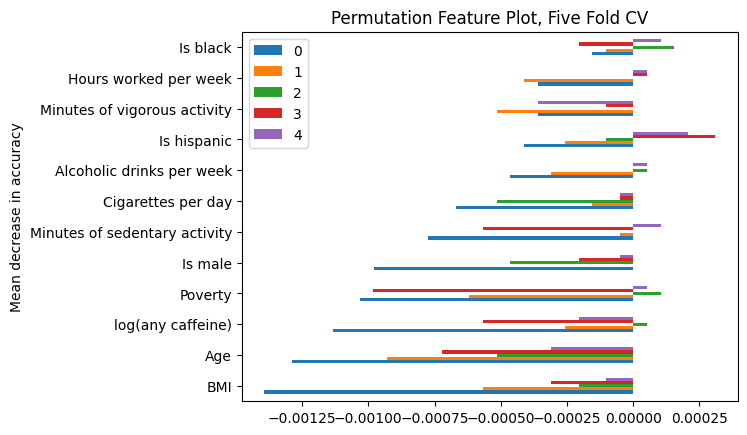

In [8]:
plt.figure(figsize=(10,12))
forest_importances.sort_values(ascending = True, by=0).plot.barh()
plt.title("Permutation Feature Plot, Five Fold CV")
plt.ylabel("Mean decrease in accuracy")
plt.show()